<a href="https://colab.research.google.com/github/pankaj18/AI_for_medicine/blob/master/Brain_Tumor_Classification_keras_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brain Tumor Classification

## Clone the Github Repo to access the Dataset

In [10]:
!git clone https://github.com/Ashish-Arya-CS/Coursera-Content.git

fatal: destination path 'Coursera-Content' already exists and is not an empty directory.


## Import necessary Libraries 

In [11]:
import os
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator, array_to_img
from tensorflow.keras.applications import EfficientNetB1

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,Dropout,GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import imutils    


## Creating Directories to store Cropped Images

In [12]:
# Create Directory for Training Data
os.mkdir("/content/Crop-Brain-MRI")
os.mkdir("/content/Crop-Brain-MRI/glioma_tumor")
os.mkdir("/content/Crop-Brain-MRI/meningioma_tumor")
os.mkdir("/content/Crop-Brain-MRI/no_tumor")
os.mkdir("/content/Crop-Brain-MRI/pituitory_tumor")

FileExistsError: ignored

In [4]:
# Create Directory for Testing Data
# Create Directory for Training Data
os.mkdir("/content/Crop-Brain-MRI_test")
os.mkdir("/content/Crop-Brain-MRI_test/glioma_tumor")
os.mkdir("/content/Crop-Brain-MRI_test/meningioma_tumor")
os.mkdir("/content/Crop-Brain-MRI_test/no_tumor")
os.mkdir("/content/Crop-Brain-MRI_test/pituitory_tumor")

## Data Visualization

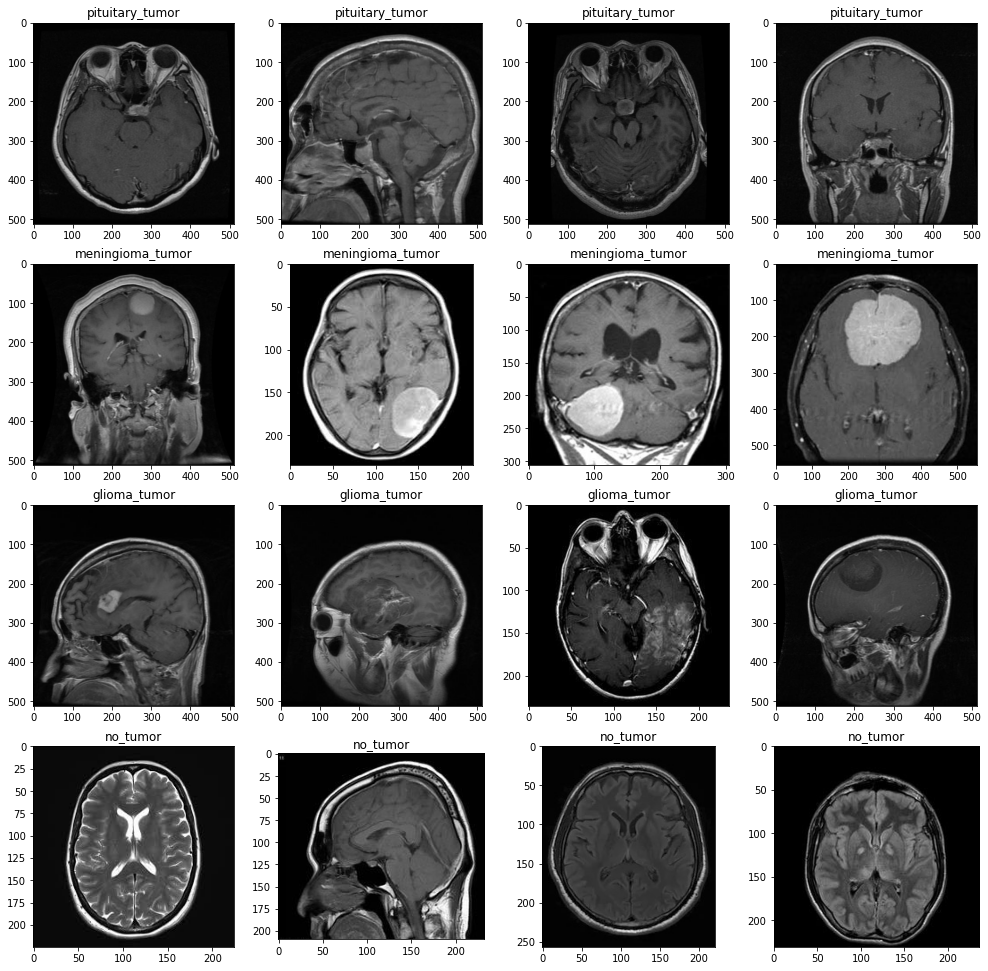

In [13]:
train_dir= "/content/Coursera-Content/Brain-MRI/Training/"
test_dir="/content/Coursera-Content/Brain-MRI/Testing/"
classes=os.listdir(train_dir)
files_path_dict={}
for c in classes:
  files_path_dict[c]=list(map(lambda x:train_dir+c+'/'+x, os.listdir(train_dir+c)))

plt.figure(figsize=(17,17))
index=0
for c in classes:
  random.shuffle(files_path_dict[c])
  path_list=files_path_dict[c][:5]

  for i in range(1,5):
    index+=1
    plt.subplot(4,4,index)
    plt.imshow(load_img(path_list[i]))
    plt.title(c)

## Create a Function to Crop Images

In [14]:
def crop_image(image, plot=False):
    
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
    
    img_thresh = cv2.threshold(img_gray, 45, 255, cv2.THRESH_BINARY)[1]
    img_thresh = cv2.erode(img_thresh, None, iterations=2)
    img_thresh = cv2.dilate(img_thresh, None, iterations=2)

    contours = cv2.findContours(img_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    c = max(contours, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()
    
    return new_image


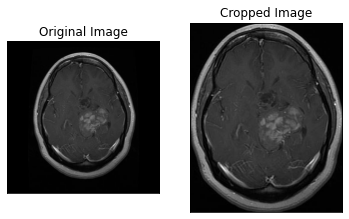

In [15]:
example_img=cv2.imread("/content/Coursera-Content/Brain-MRI/Training/glioma_tumor/gg (1).jpg")
cropped_image=crop_image(example_img,plot=True)

## Saving The Cropped Images 

In [16]:
# Crop the Training Images and Save it to the Directory we previously cretaed
glioma=train_dir+"glioma_tumor"
meningioma=train_dir+"meningioma_tumor"
no_tumor=train_dir+"no_tumor"
pituitary=train_dir+"pituitary_tumor"
j=0
for i in tqdm(os.listdir(glioma)):
  path=os.path.join(glioma,i)
  image=cv2.imread(path)
  image=crop_image(image,plot=False)
  if image is not None:
    image=cv2.resize(image,(224,224))
    save_path="/content/Crop-Brain-MRI/glioma_tumor/"+str(j)+".jpg"
    cv2.imwrite(save_path,image)
    j=j+1

j=0
for i in tqdm(os.listdir(meningioma)):
  path=os.path.join(meningioma,i)
  image=cv2.imread(path)
  image=crop_image(image,plot=False)
  if image is not None:
    image=cv2.resize(image,(224,224))
    save_path="/content/Crop-Brain-MRI/meningioma/"+str(j)+".jpg"
    cv2.imwrite(save_path,image)
    j=j+1

j=0
for i in tqdm(os.listdir(no_tumor)):
  path=os.path.join(no_tumor,i)
  image=cv2.imread(path)
  image=crop_image(image,plot=False)
  if image is not None:
    image=cv2.resize(image,(224,224))
    save_path="/content/Crop-Brain-MRI/no_tumor/"+str(j)+".jpg"
    cv2.imwrite(save_path,image)
    j=j+1

j=0
for i in tqdm(os.listdir(pituitary)):
  path=os.path.join(pituitary,i)
  image=cv2.imread(path)
  image=crop_image(image,plot=False)
  if image is not None:
    image=cv2.resize(image,(224,224))
    save_path="/content/Crop-Brain-MRI/pituitary/"+str(j)+".jpg"
    cv2.imwrite(save_path,image)
    j=j+1



100%|██████████| 901/901 [00:05<00:00, 171.29it/s]


In [18]:
# Crop the Testing Images and Save it to the Directory we previously cretaed
glioma=test_dir+"glioma_tumor"
meningioma=test_dir+"meningioma_tumor"
no_tumor=test_dir+"no_tumor"
pituitary=test_dir+"pituitary_tumor"
j=0
for i in tqdm(os.listdir(glioma)):
  path=os.path.join(glioma,i)
  image=cv2.imread(path)
  image=crop_image(image,plot=False)
  if image is not None:
    image=cv2.resize(image,(224,224))
    save_path="/content/Crop-Brain-MRI_test/glioma_tumor/"+str(j)+".jpg"
    cv2.imwrite(save_path,image)
    j=j+1

j=0
for i in tqdm(os.listdir(meningioma)):
  path=os.path.join(meningioma,i)
  image=cv2.imread(path)
  image=crop_image(image,plot=False)
  if image is not None:
    image=cv2.resize(image,(224,224))
    save_path="/content/Crop-Brain-MRI_test/meningioma/"+str(j)+".jpg"
    cv2.imwrite(save_path,image)
    j=j+1

j=0
for i in tqdm(os.listdir(no_tumor)):
  path=os.path.join(no_tumor,i)
  image=cv2.imread(path)
  image=crop_image(image,plot=False)
  if image is not None:
    image=cv2.resize(image,(224,224))
    save_path="/content/Crop-Brain-MRI_test/no_tumor/"+str(j)+".jpg"
    cv2.imwrite(save_path,image)
    j=j+1

j=0
for i in tqdm(os.listdir(pituitary)):
  path=os.path.join(pituitary,i)
  image=cv2.imread(path)
  image=crop_image(image,plot=False)
  if image is not None:
    image=cv2.resize(image,(224,224))
    save_path="/content/Crop-Brain-MRI_test/pituitary/"+str(j)+".jpg"
    cv2.imwrite(save_path,image)
    j=j+1



100%|██████████| 5/5 [00:00<00:00, 122.01it/s]


## Perform Data Augmentation and Prepare the Train, Validation and Test Dataset

In [19]:
# Use Image Data Generator to perform this task.
datagen=ImageDataGenerator(rotation_range=10,
                           height_shift_range=0.2,
                           horizontal_flip=True,
                           validation_split=0.2)
train_data=datagen.flow_from_directory("/content/Crop-Brain-MRI/",
                                 target_size=(224,224),
                                 batch_size=32,
                                 class_mode='categorical',
                                 subset="training")
valid_data=datagen.flow_from_directory("/content/Crop-Brain-MRI/",
                                 target_size=(224,224),
                                 batch_size=32,
                                 class_mode='categorical',
                                 subset="validation")
test_datagen=ImageDataGenerator()
test_data=test_datagen.flow_from_directory("/content/Crop-Brain-MRI_test/",
                                 target_size=(224,224),
                                 class_mode='categorical'
                                )



Found 1142 images belonging to 4 classes.
Found 285 images belonging to 4 classes.
Found 10 images belonging to 4 classes.


In [20]:
# View the class dictionary
print(train_data.class_indices)
print(test_data.class_indices)

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitory_tumor': 3}
{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitory_tumor': 3}


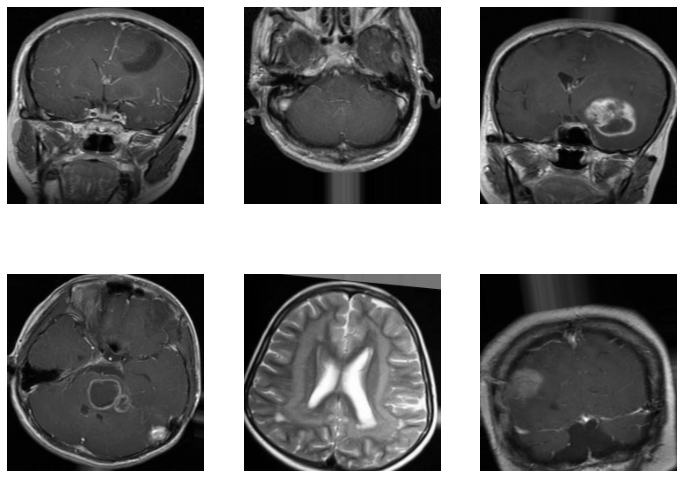

In [21]:
# View the augmented data.
sample_x,sample_y=next(train_data)
plt.figure(figsize=(12,9))
for i in range(6):
  plt.subplot(2,3,i+1)
  sample=array_to_img(sample_x[i])
  plt.axis('off')
  plt.grid(False)
  plt.imshow(sample)
plt.show()

## Build and Compile the Model 

In [22]:
# Build the Model
effnet=EfficientNetB1(weights="imagenet",include_top=False,input_shape=(224,224,3))
model=effnet.output
model= GlobalAveragePooling2D()(model)
model=Dropout(0.5)(model)
model=Dense(4,activation='softmax')(model)
model=Model(inputs=effnet.input,outputs=model)
model.summary()


27025408/27018416 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_____________________________

## Model Training and Model Evaluation

In [24]:
# Train the model
model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy")
checkpoint=ModelCheckpoint("model.h5",monitor="val_loss",
                                         save_best_only=True,mode="auto",
                                         verbose=1)
earlystop=EarlyStopping("val_loss",patience=5,mode="auto",verbose=1)

In [25]:
# Plot the training curves
history=model.fit(train_data,epochs=7,validation_data=valid_data,
                  verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/7
36/36 [==============================] - 83s 1s/step - loss: 1.0736 - val_loss: 0.5263

Epoch 00001: val_loss improved from inf to 0.52625, saving model to model.h5
Epoch 2/7
36/36 [==============================] - 33s 910ms/step - loss: 0.2849 - val_loss: 0.2782

Epoch 00002: val_loss improved from 0.52625 to 0.27824, saving model to model.h5
Epoch 3/7
36/36 [==============================] - 33s 903ms/step - loss: 0.1399 - val_loss: 0.1829

Epoch 00003: val_loss improved from 0.27824 to 0.18290, saving model to model.h5
Epoch 4/7
36/36 [==============================] - 33s 909ms/step - loss: 0.0831 - val_loss: 0.1518

Epoch 00004: val_loss improved from 0.18290 to 0.15184, saving model to model.h5
Epoch 5/7
36/36 [==============================] - 33s 906ms/step - loss: 0.0343 - val_loss: 0.1402

Epoch 00005: val_loss improved from 0.15184 to 0.14017, saving model to model.h5
Epoch 6/7
36/36 [==============================] - 33s 906ms/step - loss: 0.0324 - val_loss: 0.11

In [26]:
model.evaluate(test_data)

1/1 [==============================] - 1s 860ms/step - loss: 0.4346


0.43460044264793396

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


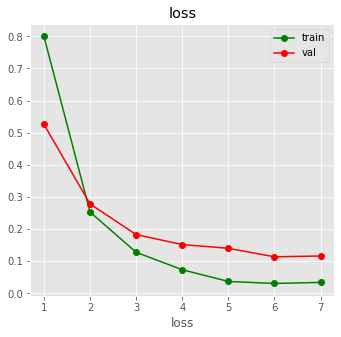

In [27]:
#plot the training curves
plt.style.use('ggplot')
plt.figure(figsize=(12,5))
epochs=range(1,8)


plt.subplot(1,2,1)
plt.plot(epochs,history.history['loss'],"go-")
plt.plot(epochs,history.history['val_loss'],"ro-")
plt.title('loss')
plt.xlabel('loss')
plt.legend(['train','val'],loc="upper_left")

In [28]:
# Evaluate the model on Test Set

## Obtaining Predictions on Test Images

In [29]:
# Obtain Predictions on Test Images
class_dict={0:"glioma_tumor",
            1:"meningioma_tumor",
            2:"no_tumor",
            3:"pitui"}
#test_img1=cv2.imread("/content/Crop-Brain-MRI_test/glioma_tumor/0.jpg")

glioma_tumor


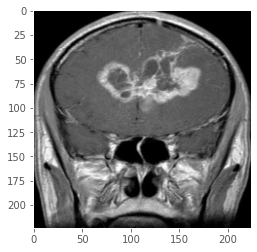

In [30]:
test_img1=cv2.imread("/content/Crop-Brain-MRI_test/glioma_tumor/0.jpg")
plt.imshow(test_img1)
plt.grid(False)
test_img1=np.expand_dims(test_img1,axis=0)
pred=model.predict(test_img1)
pred=np.argmax(pred)
pred_class=class_dict[pred]
print(pred_class)